## .dat File Processing Scripting <br>

Script contains data processing for .dat files from post_kmc.lammmps

In [1]:
import numpy as np
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.lines as mlines
import pandas as pd

### Extract all .dat files as pandas dfs

In [3]:
headers = ['step','pxx', 'pyy', 'pzz', 'lx', 'ly', 'lz','vol', 'temp', 'etotal']

# Read the file and extract the required columns
def create_df(file_path):
    # Read the file and extract the required columns
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Skip empty lines or lines that start with comments (if any)
            if not line.strip() or line.startswith('#'):
                continue
            
            # Split the line into columns
            columns = line.split()
            
            # Add line
            data.append(columns)

    # Create a DataFrame from the data
    df = pd.DataFrame(data, columns=headers)

    # Convert columns to numeric if possible
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    return df

# 1. Equilibrium 
eq_full = create_df('lammps/64x64x64_full/si_64x64x64_full_equil.dat')
eq_5defect = create_df('lammps/64x64x64_5defectsperlayer/si_64x64x64_5defectsperlayer_equil.dat')
eq_10defect = create_df('lammps/64x64x64_10defectsperlayer/si_64x64x64_10defectsperlayer_equil.dat')

# 2. Anneal
anneal_full = create_df('lammps/64x64x64_full/si_64x64x64_full_annealing.dat')
anneal_5defect = create_df('lammps/64x64x64_5defectsperlayer/si_64x64x64_5defectsperlayer_annealing.dat')
anneal_10defect = create_df('lammps/64x64x64_10defectsperlayer/si_64x64x64_10defectsperlayer_annealing.dat')

# 3. Cool 
cool_full = create_df('lammps/64x64x64_full/si_64x64x64_full_cooling.dat')
cool_5defect = create_df('lammps/64x64x64_5defectsperlayer/si_64x64x64_5defectsperlayer_cooling.dat')
cool_10defect = create_df('lammps/64x64x64_10defectsperlayer/si_64x64x64_10defectsperlayer_cooling.dat')

# 4. Equilibrium again 
eq_full2 = create_df('lammps/64x64x64_full/si_64x64x64_full_equil_pass2.dat')
eq_5defect2 = create_df('lammps/64x64x64_5defectsperlayer/si_64x64x64_5defectsperlayer_equil_pass2.dat')
eq_10defect2 = create_df('lammps/64x64x64_10defectsperlayer/si_64x64x64_10defectsperlayer_equil_pass2.dat')


### 1. Equilibrium

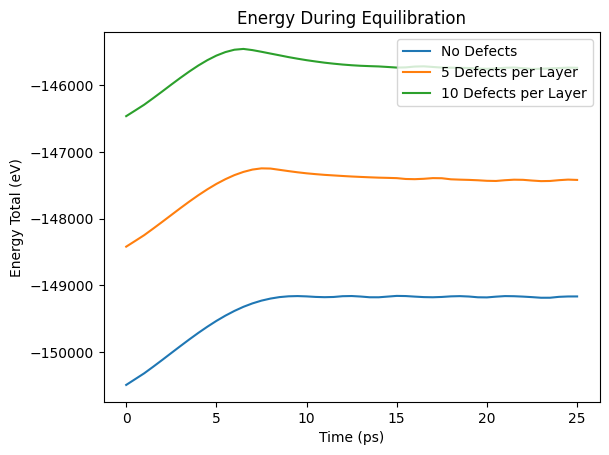

In [24]:
# Total Energy
plt.plot(eq_full['step'][0:] * 0.005 , eq_full['etotal'][0:], label='No Defects')
plt.plot(eq_5defect['step'][0:] * 0.005 , eq_5defect['etotal'][0:], label='5 Defects per Layer')
plt.plot(eq_10defect['step'][0:] * 0.005 , eq_10defect['etotal'][0:], label='10 Defects per Layer')
plt.xlabel('Time (ps)'), plt.ylabel('Energy Total (eV)'), plt.title('Energy During Equilibration')
plt.legend(loc='upper right')
plt.show()

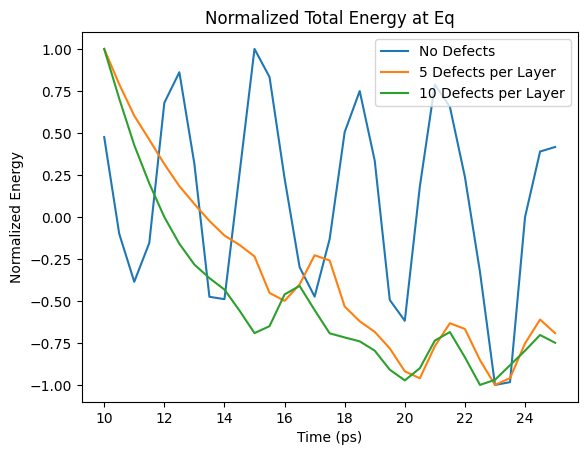

In [25]:
# Total Energy Noramlized at Equilibrium
def normalize_minus1_to_1(series):
    return 2 * (series - series.min()) / (series.max() - series.min()) - 1

plt.plot(eq_full['step'][20:]* 0.005, normalize_minus1_to_1(eq_full['etotal'][20:]), label='No Defects')
plt.plot(eq_5defect['step'][20:]* 0.005, normalize_minus1_to_1(eq_5defect['etotal'][20:]), label='5 Defects per Layer')
plt.plot(eq_10defect['step'][20:]* 0.005, normalize_minus1_to_1(eq_10defect['etotal'][20:]), label='10 Defects per Layer')

plt.xlabel('Time (ps)')
plt.ylabel('Normalized Energy')
plt.legend()
plt.title('Normalized Total Energy at Eq')
plt.show()

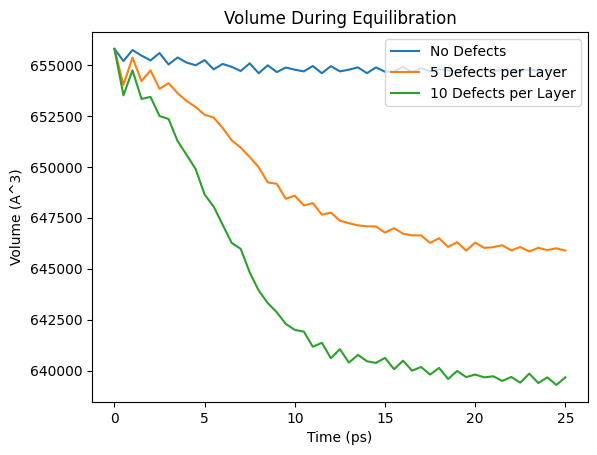

In [26]:
# Volume
plt.plot(eq_full['step'][0:] * 0.005 , eq_full['vol'][0:], label='No Defects')
plt.plot(eq_5defect['step'][0:] * 0.005 , eq_5defect['vol'][0:], label='5 Defects per Layer')
plt.plot(eq_10defect['step'][0:] * 0.005 , eq_10defect['vol'][0:], label='10 Defects per Layer')
plt.xlabel('Time (ps)'), plt.ylabel('Volume (A^3)'), plt.title('Volume During Equilibration')
plt.legend(loc='upper right')
plt.show()

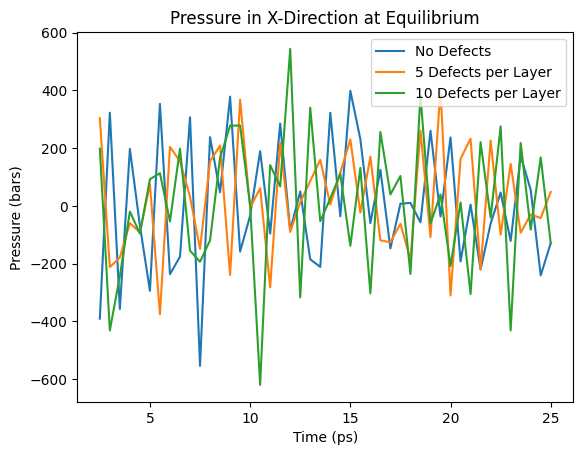

In [27]:
# Pressure
plt.plot(eq_full['step'][5:] * 0.005 , eq_full['pxx'][5:], label='No Defects')
plt.plot(eq_5defect['step'][5:] * 0.005 , eq_5defect['pxx'][5:], label='5 Defects per Layer')
plt.plot(eq_10defect['step'][5:] * 0.005 , eq_10defect['pxx'][5:], label='10 Defects per Layer')
plt.xlabel('Time (ps)'), plt.ylabel('Pressure (bars)'), plt.title('Pressure in X-Direction at Equilibrium')
plt.legend(loc='upper right')
plt.show()

### 2. Annealing Process

In [28]:
# Combining eq, annealing, cooling and eq2, overlapping starting at time step 0
combined_full = pd.concat([eq_full, anneal_full, cool_full, eq_full2], ignore_index=True)
combined_5defect = pd.concat([eq_5defect, anneal_5defect, cool_5defect, eq_5defect2], ignore_index=True)
combined_10defect = pd.concat([eq_10defect, anneal_10defect, cool_10defect, eq_10defect2], ignore_index=True)

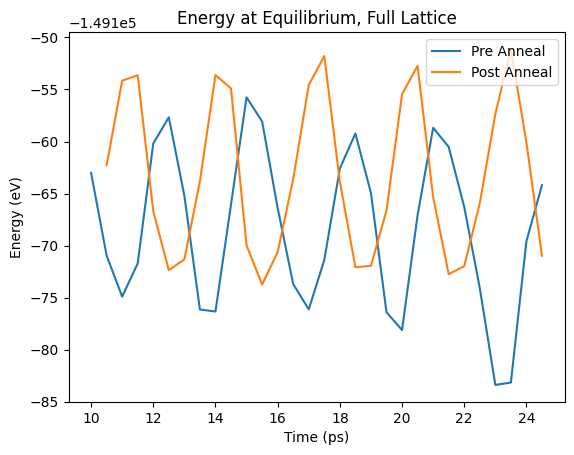

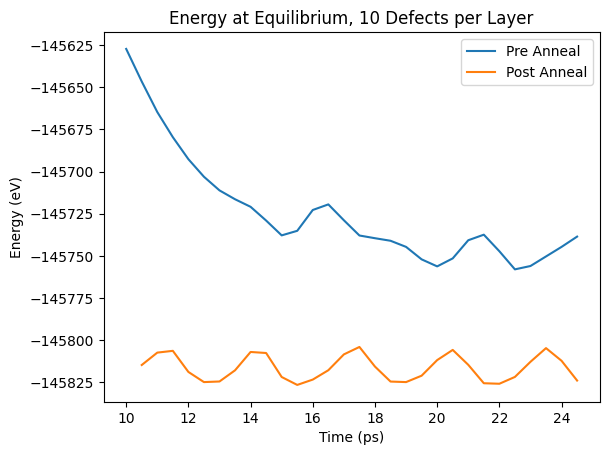

In [29]:
# Energy
plt.plot(combined_full['step'][20:50] * 0.005 , combined_full['etotal'][20:50], label='Pre Anneal')
plt.plot(combined_full['step'][-30:-1] * 0.005 , combined_full['etotal'][-30:-1], label='Post Anneal')

plt.xlabel('Time (ps)'), plt.ylabel('Energy (eV)'), plt.title('Energy at Equilibrium, Full Lattice')
plt.legend(loc='upper right')
plt.show()

plt.plot(combined_10defect['step'][20:50] * 0.005 , combined_10defect['etotal'][20:50], label='Pre Anneal')
plt.plot(combined_10defect['step'][-30:-1] * 0.005 , combined_10defect['etotal'][-30:-1], label='Post Anneal')

plt.xlabel('Time (ps)'), plt.ylabel('Energy (eV)'), plt.title('Energy at Equilibrium, 10 Defects per Layer')
plt.legend(loc='upper right')
plt.show()

In [31]:
# Combining eq, annealing, cooling and eq2, with their times relative to each other
anneal_full['step'] += 5000
cool_full['step'] += 5000 + 5000
eq_full2['step'] += 5000 + 5000 + 10000

anneal_5defect['step'] += 5000
cool_5defect['step'] += 5000 + 5000
eq_5defect2['step'] += 5000 + 5000 + 10000

anneal_10defect['step'] += 5000
cool_10defect['step'] += 5000 + 5000
eq_10defect2['step'] += 5000 + 5000 + 10000

combined_full = pd.concat([eq_full, anneal_full, cool_full, eq_full2], ignore_index=True)
combined_5defect = pd.concat([eq_5defect, anneal_5defect, cool_5defect, eq_5defect2], ignore_index=True)
combined_10defect = pd.concat([eq_10defect, anneal_10defect, cool_10defect, eq_10defect2], ignore_index=True)

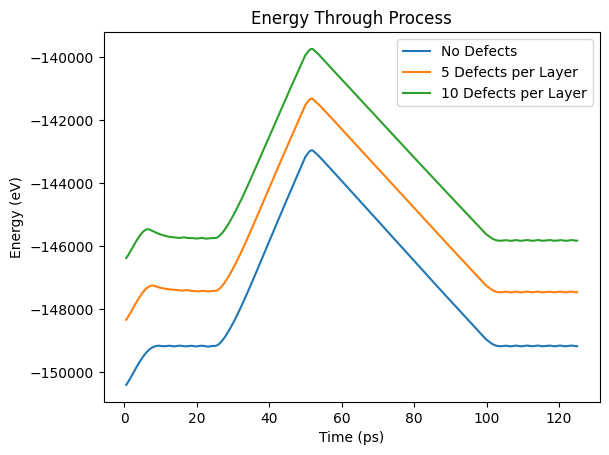

In [32]:
plt.plot(combined_full['step'][1:] * 0.005 , combined_full['etotal'][1:], label='No Defects')
plt.plot(combined_5defect['step'][1:] * 0.005 , combined_5defect['etotal'][1:], label='5 Defects per Layer')
plt.plot(combined_10defect['step'][1:] * 0.005 , combined_10defect['etotal'][1:], label='10 Defects per Layer')
plt.xlabel('Time (ps)'), plt.ylabel('Energy (eV)'), plt.title('Energy Through Process')
plt.legend(loc='upper right')
plt.show()

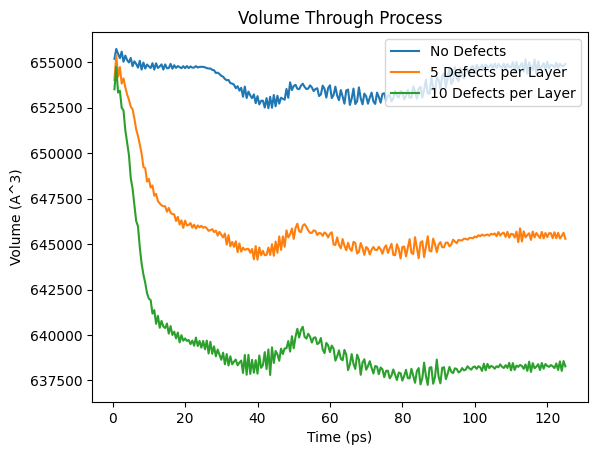

In [33]:
plt.plot(combined_full['step'][1:] * 0.005 , combined_full['vol'][1:], label='No Defects')
plt.plot(combined_5defect['step'][1:] * 0.005 , combined_5defect['vol'][1:], label='5 Defects per Layer')
plt.plot(combined_10defect['step'][1:] * 0.005 , combined_10defect['vol'][1:], label='10 Defects per Layer')
plt.xlabel('Time (ps)'), plt.ylabel('Volume (A^3)'), plt.title('Volume Through Process')
plt.legend(loc='upper right')
plt.show()